In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import torch
import pickle
import numpy as np
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/AI프로젝트/도서추천/"
matrix_file = "book_vectors_matrix.pkl"

In [4]:
with open(path + matrix_file, "rb") as f:
  matrix = pickle.load(f)
print(matrix.shape)

(621, 768)


In [5]:
df = pd.read_csv(path + "songs_with_tags2.csv", sep="\t")
df.head()

,song_code,song_title,artist,album_cover,album_title,public_date,genre,lyrics,public_date_DV,emotion,singer_code,song_name,singer_name,plylstseq,tag
0,31927275,한 페이지가 될 수 있게,DAY6 (데이식스),https://cdnimg.melon.co.kr/cm/album/images/103...,The Book of Us : Gravity,2019.07.15,록/메탈,솔직히 말할게 많이 기다려 왔어 너도 그랬을 거라 믿어 오늘이 오길 매일같이 달력을...,2020,기쁨,894864,한 페이지가 될 수 있게,DAY6 (데이식스),506070970//462790646//535604305//502268707//52...,댄스//드라이브//신나는//여행//케이팝//아이돌//kpop//드라이브//여행//그...
1,37023625,비의 랩소디,임재현,https://cdnimg.melon.co.kr/cm2/album/images/11...,비의 랩소디,2023.12.03,발라드,이젠 눈물 그쳐 나를 봐요 우는 그대 더 아름다워 내게 이 모습조차 더 남지 않도록...,2020,슬픔,2087273,비의 랩소디,임재현,457536543//534972865//457505963//405075509//53...,발라드//감성//카페//명곡//가요//까페//국내//발라드//봄//발라드//카페//...
2,36382580,헤어지자 말해요,박재정,https://cdnimg.melon.co.kr/cm2/album/images/11...,1집 Alone,2023.04.20,발라드,헤어지자고 말하려 오늘 너에게 가다가 우리 추억 생각해 봤어 처음 본 네 얼굴 마주...,2020,슬픔,738480,헤어지자 말해요,박재정,457536543//100098236//534972865//457505963//48...,발라드//감성//카페//명곡//가요//까페//국내//발라드//추억//명곡//스트레스...
3,4446485,너의 모든 순간,성시경,https://cdnimg.melon.co.kr/cm/album/images/022...,별에서 온 그대 OST Part.7,2014.02.12,발라드,이윽고 내가 한눈에 너를 알아봤을 때 모든 건 분명 달라지고 있었어 내 세상은 널 ...,2010,기쁨,3305,너의 모든 순간,성시경,457536543//534972865//457505963//527521183//50...,발라드//감성//카페//명곡//가요//까페//국내//발라드//봄//발라드//카페//...
4,31666417,주저하는 연인들을 위해,잔나비,https://cdnimg.melon.co.kr/cm/album/images/102...,전설,2019.03.13,인디음악,나는 읽기 쉬운 마음이야 당신도 스윽 훑고 가셔요 달랠 길 없는 외로운 마음 있지 ...,2020,슬픔,772253,주저하는 연인들을 위해,잔나비,534972865//521849384//457536706//401872364//53...,발라드//봄//인디//인디//가요//국내//인디//밤//최신가요//겨울//따뜻한//...


In [6]:
song_title = df.song_title.to_list()
song_title[:5]

['한 페이지가 될 수 있게', '비의 랩소디', '헤어지자 말해요', '너의 모든 순간', '주저하는 연인들을 위해']

In [7]:
title2idx = {}
for i, title in enumerate(song_title):
  title2idx[title] = i

In [8]:
idx2title = {v: k for k, v in title2idx.items()}
idx2emotion = {k: v for k, v in enumerate(df.emotion.tolist())}

In [9]:
df.shape

(621, 15)

# PCA

(621, 768)
PCA 결과 형상: (621, 5)


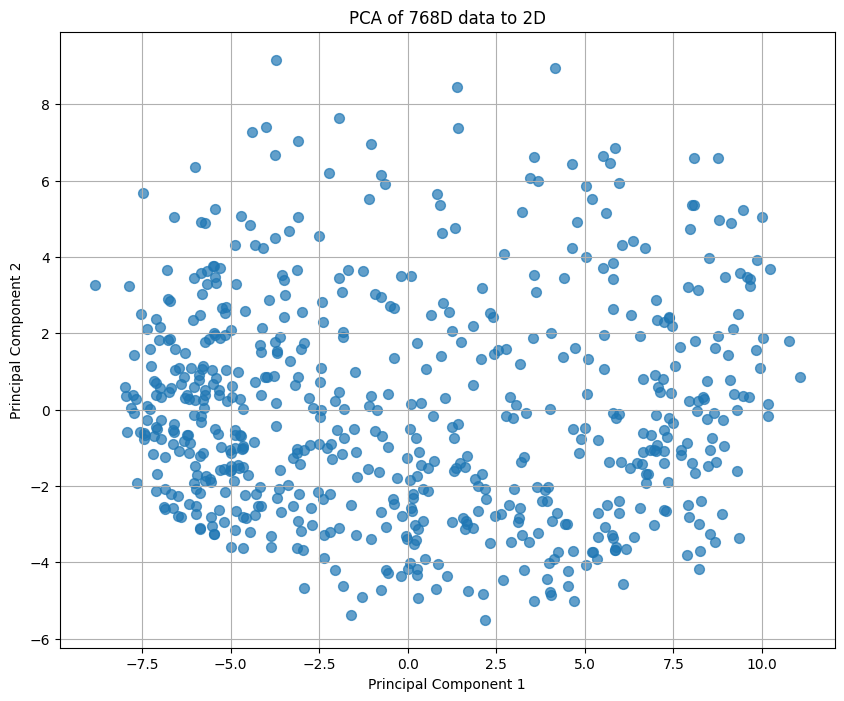

In [14]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

with open(path + matrix_file, "rb") as f:
  matrix = pickle.load(f)
print(matrix.shape)

# PCA 객체 생성 및 2차원으로 축소
pca = PCA(n_components=5)
pca_result = pca.fit_transform(matrix)

# 결과 확인
print("PCA 결과 형상:", pca_result.shape)

# PCA 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, alpha=0.7)
plt.title("PCA of 768D data to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


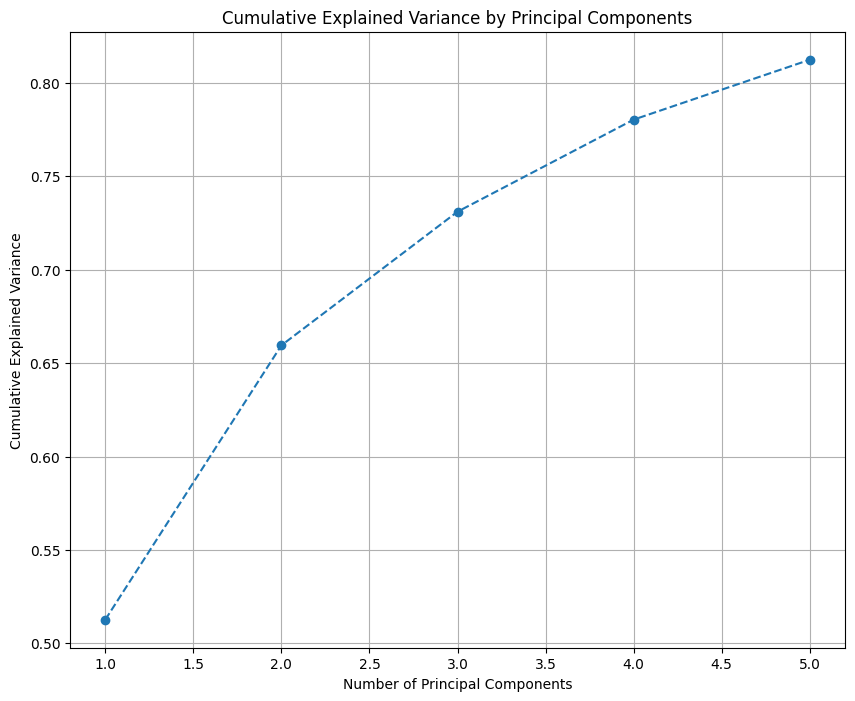

In [15]:
# 누적 설명 분산 비율 계산
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 주성분 수 설정
num_components = len(explained_variance_ratio)

# 누적 설명 분산 비율 시각화
plt.figure(figsize=(10, 8))
plt.plot(range(1, num_components + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


In [22]:
koremotion2engemotion = {
    "기쁨": "happiness",
    "슬픔": "sadness",
    "분노": "anger",
    "불안": "anxiety",
    "당황": "surprise",
    "상처": "hurt",
    "중립": "neutral"
}

In [17]:
# PCA 객체 생성 및 2차원으로 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(matrix)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

In [19]:
pca_df["idx"] = [i for i in range(df.shape[0])]
pca_df["emotion"] = pca_df["idx"].apply(lambda x: idx2emotion[x])

In [23]:
pca_df['emotion'] = pca_df['emotion'].apply(lambda x : koremotion2engemotion[x])

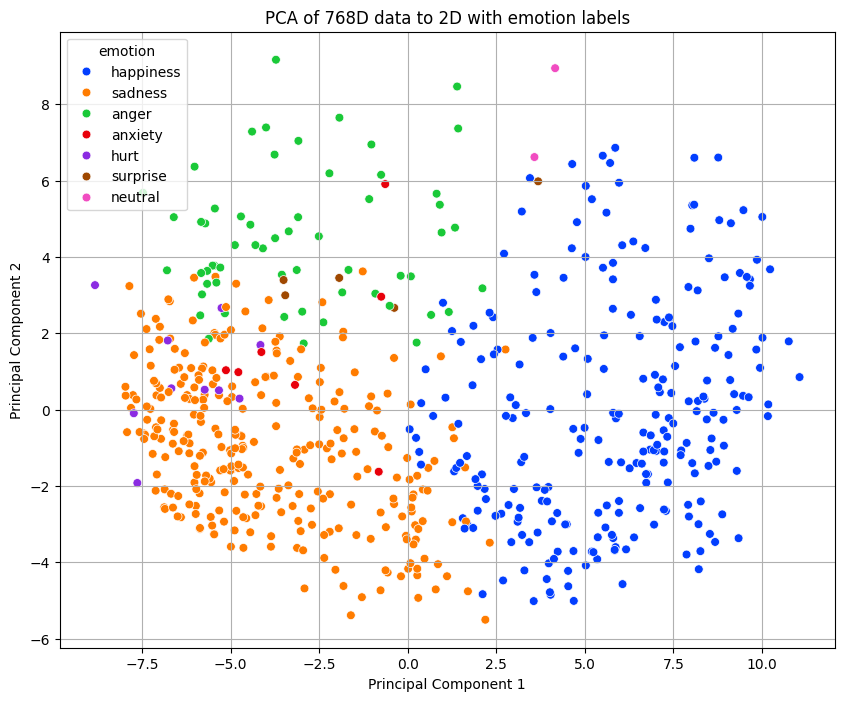

In [28]:
import seaborn as sns
# Seaborn을 사용한 산점도 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='emotion', palette='bright', s=40)
plt.title("PCA of 768D data to 2D with emotion labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [29]:
pca_df.head()

,PC1,PC2,idx,emotion
0,6.952580,-3.011123,0,happiness
1,-5.560644,-2.810746,1,sadness
2,-3.606335,-1.578815,2,sadness
3,8.206405,-3.000603,3,happiness
4,0.580614,-1.526068,4,sadness


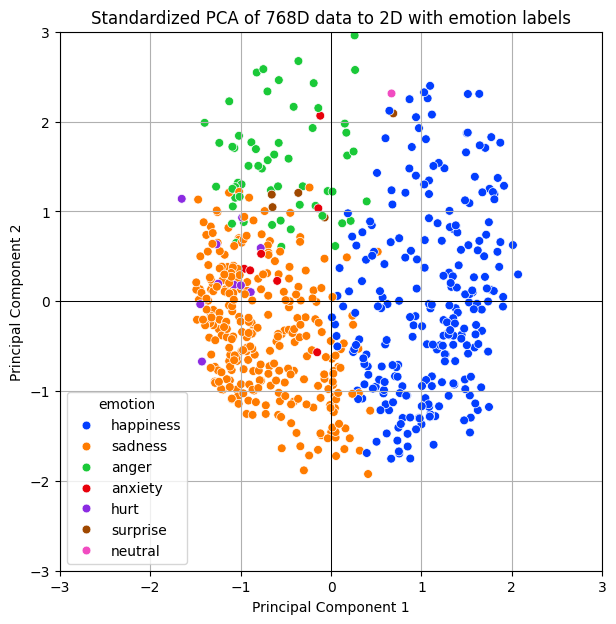

In [39]:
from sklearn.preprocessing import StandardScaler
# PCA 결과 표준화
scaler = StandardScaler()
pca_df[['PC1', 'PC2']] = scaler.fit_transform(pca_df[['PC1', 'PC2']])

# Seaborn을 사용한 산점도 시각화
plt.figure(figsize=(7, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='emotion', palette='bright', s=40)
plt.title("Standardized PCA of 768D data to 2D with emotion labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xlim(-3.0, 3.0)
plt.ylim(-3.0, 3.0)
plt.grid(True)
# x축과 y축에 진한 검은 직선 추가
plt.axhline(y=0, color='black', linewidth=0.7)
plt.axvline(x=0, color='black', linewidth=0.7)
plt.show()